![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [74]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [76]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [77]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [78]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

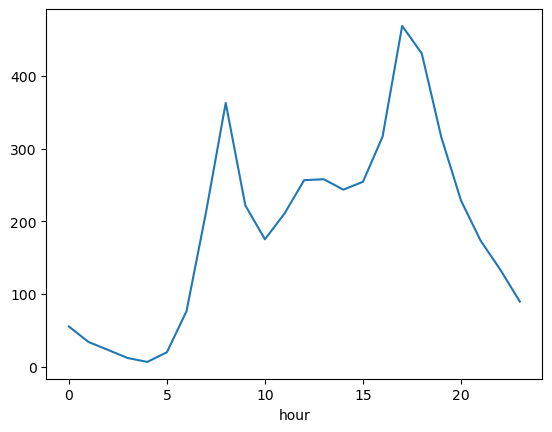

In [79]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<Axes: title={'center': 'Número promedio de bicicletas rentadas por hora en invierno'}, xlabel='hour'>

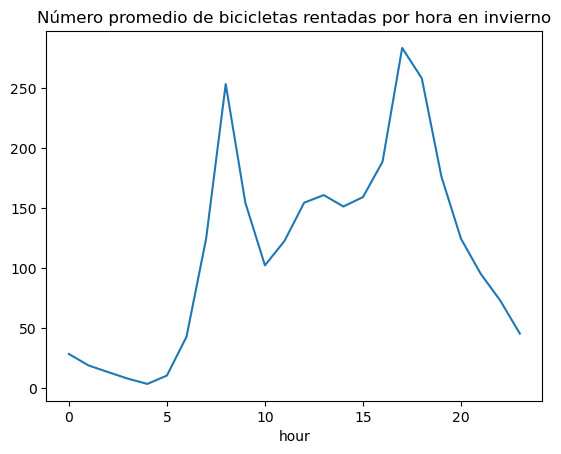

In [80]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 

# Filtrar los datos para la temporada de invierno (season = 1)
bikes_invierno = bikes[bikes['season'] == 1]

# Calcular el promedio de bicicletas rentadas por hora
promedio_invierno = bikes_invierno.groupby('hour').total.mean()

# Graficar
promedio_invierno.plot(title='Número promedio de bicicletas rentadas por hora en invierno')


<Axes: title={'center': 'Número promedio de bicicletas rentadas por hora en verano'}, xlabel='hour'>

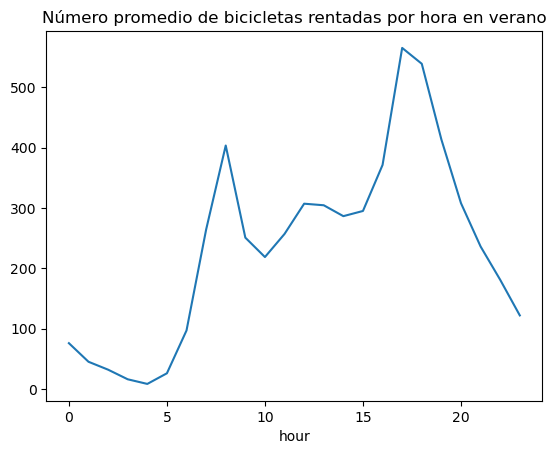

In [81]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 

# Filtrar los datos para la temporada de verano (season = 3)
bikes_verano = bikes[bikes['season'] == 3]

# Calcular el promedio de bicicletas rentadas por hora
promedio_verano = bikes_verano.groupby('hour').total.mean()

# Graficar
promedio_verano.plot(title='Número promedio de bicicletas rentadas por hora en verano')

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [82]:
# Celda 3
# Convertir 'season' en variables dummy
season_dummies = pd.get_dummies(bikes['season'], prefix='season', drop_first=True)
bikes = pd.concat([bikes, season_dummies], axis=1)

# Definir las variables independientes y dependiente
X = bikes[['hour', 'season_2', 'season_3', 'season_4']] # season_1 es la categoría de referencia
y = bikes['total']

# Ajuste del modelo
model = LinearRegression()
model.fit(X, y)

# Coeficientes del modelo
print('Coeficientes:', model.coef_)

Coeficientes: [ 10.54520609 100.31723192 119.46754995  84.08311787]


# Interpretación de los Coeficientes:

"Hour" (10.55): Por cada hora adicional, el número de bicicletas rentadas aumenta en promedio 10.55 unidades.

"Season_2" (100.32): En la temporada 2, el número promedio de bicicletas rentadas aumenta en 100.32 unidades comparado con la temporada 1.

"Season_3" (119.47): En la temporada 3, el incremento es aún mayor, 119.47 unidades más en promedio que en la temporada 1.

"Season_4" (84.08): En la temporada 4, hay un aumento promedio de 84.08 unidades en comparación con la temporada 1.

# Limitaciones Principales:

Linealidad: La regresión lineal asume relaciones lineales, que pueden no captar complejidades o patrones no lineales en los datos reales.

Variables Omitidas: Puede haber otros factores importantes que afectan las rentas de bicicletas y que no se incluyen en el modelo.

Independencia y Homocedasticidad de los Residuos: En la práctica, estos supuestos a menudo no se cumplen, especialmente en series temporales.

Interacciones No Consideradas: El modelo no incluye posibles interacciones entre horas del día y estaciones del año, que podrían influir en las rentas de bicicletas.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [89]:
# Celda 4
# Definimos las funciones gini y gini_impurity
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

def gini_impurity(X_col, y, split):
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]

    n_l = y_l.shape[0]
    n_r = y_r.shape[0]

    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)

    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)

    return gini_impurity_

# Proceso para 'hour'
num_pct = 10
splits_hour = np.percentile(bikes['hour'], np.arange(0, 100, 100.0 / num_pct).tolist())
splits_hour = np.unique(splits_hour)

# Calculamos la ganancia de Gini para cada punto de corte
gains_hour = []
for split in splits_hour:
    gain = gini_impurity(bikes['hour'], bikes['total'], split)
    gains_hour.append((split, gain))

# Seleccionamos el mejor punto de corte
best_split_hour = max(gains_hour, key=lambda x: x[1])

# Proceso similar para 'season'
gains_season = []
for season in bikes['season'].unique():
    gain = gini_impurity(bikes['season'], bikes['total'], season)
    gains_season.append((season, gain))

best_split_season = max(gains_season, key=lambda x: x[1])

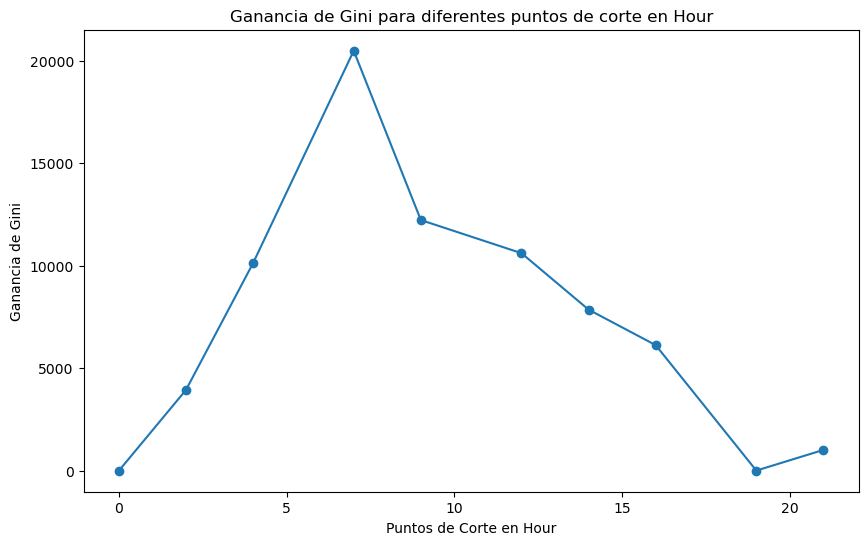

In [90]:
import matplotlib.pyplot as plt

# Suponiendo que ya has definido las funciones gini y gini_impurity

# Calcular la ganancia de Gini para cada punto de corte en 'hour'
gains_hour = []
splits_hour = np.percentile(bikes['hour'], np.arange(0, 100, 100.0 / num_pct).tolist())
splits_hour = np.unique(splits_hour)

for split in splits_hour:
    gain = gini_impurity(bikes['hour'], bikes['total'], split)
    gains_hour.append(gain)

# Visualizar la ganancia de Gini para cada punto de corte en 'hour'
plt.figure(figsize=(10, 6))
plt.plot(splits_hour, gains_hour, marker='o')
plt.xlabel('Puntos de Corte en Hour')
plt.ylabel('Ganancia de Gini')
plt.title('Ganancia de Gini para diferentes puntos de corte en Hour')
plt.show()

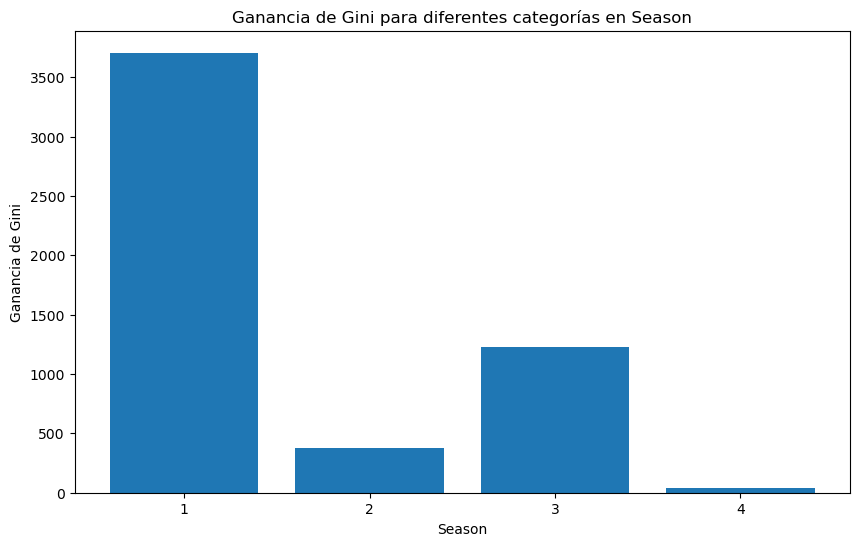

In [91]:
# Calcular la ganancia de Gini para cada categoría única en 'season'
gains_season = []
unique_seasons = bikes['season'].unique()

for season in unique_seasons:
    gain = gini_impurity(pd.Series(bikes['season'] == season), bikes['total'], True)  # Comparamos si es igual a la temporada actual
    gains_season.append(gain)

# Visualizar la ganancia de Gini para cada categoría en 'season'
plt.figure(figsize=(10, 6))
plt.bar(unique_seasons, gains_season)
plt.xlabel('Season')
plt.ylabel('Ganancia de Gini')
plt.title('Ganancia de Gini para diferentes categorías en Season')
plt.xticks(unique_seasons)
plt.show()

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [92]:
# Celda 5
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Preparar los datos
column_transformer = ColumnTransformer([
    ("season_ohe", OneHotEncoder(), ["season"])
], remainder='passthrough')

X = bikes[["season", "hour"]]
X_transformed = column_transformer.fit_transform(X)
y = bikes["total"]

# Dividir en entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

# Entrenar el modelo de árbol de decisión
tree_reg = DecisionTreeRegressor(max_depth=5)  # Ajusta la profundidad máxima como ejemplo
tree_reg.fit(X_train, y_train)

# Predecir y evaluar
y_pred = tree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 15300.568839033705
R-squared: 0.5297962489939505


# Árbol de Decisión (Usando sklearn)

Mean Squared Error (MSE): 15300.568839033705. Este valor indica un error promedio relativamente alto en las predicciones del modelo.

R-squared (R²): 0.5297962489939505. Aproximadamente el 53% de la variabilidad de la variable objetivo "total" puede ser explicada por este modelo.

## Regresión Lineal

Coeficientes:
"Hour": Un aumento de una unidad en "hour" incrementa "total" en promedio por 10.54520609 unidades.

"Season_2", "Season_3", "Season_4": Cambios en las estaciones respecto a la temporada base (asumida como "season_1") tienen diferentes impactos en "total", siendo positivos y variando en magnitud.

## Comparación y Análisis

Árbol de Decisión: Ofrece una representación más clara de las decisiones de predicción y es capaz de capturar relaciones no lineales, pero muestra un error promedio más alto (MSE) y una capacidad moderada de explicar la varianza en los datos (R²).

Regresión Lineal: Proporciona una interpretación directa del impacto de cada hora y temporada en "total", pero carece de flexibilidad para capturar relaciones no lineales o interacciones complejas sin modificaciones adicionales.

## Elección del Modelo

La elección entre el árbol de decisión y la regresión lineal depende de la necesidad de precisión frente a la interpretabilidad y del tipo de relaciones (lineales o no lineales) presentes en tus datos.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [93]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [96]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [97]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [98]:
# Celda 6
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Árbol de Decisión
tree_clf = DecisionTreeClassifier(max_depth=5)  # Calibrar max_depth
tree_clf.fit(X_train, y_train)
tree_pred = tree_clf.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_pred)
tree_f1 = f1_score(y_test, tree_pred)

# Regresión Logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(X_test)
log_accuracy = accuracy_score(y_test, log_pred)
log_f1 = f1_score(y_test, log_pred)

# Imprimir métricas
print("Árbol de Decisión - Accuracy:", tree_accuracy, "F1-Score:", tree_f1)
print("Regresión Logística - Accuracy:", log_accuracy, "F1-Score:", log_f1)


Árbol de Decisión - Accuracy: 0.6373333333333333 F1-Score: 0.6616915422885573
Regresión Logística - Accuracy: 0.6133333333333333 F1-Score: 0.6102150537634409


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [100]:
# Celda 7
from sklearn.ensemble import BaggingClassifier

# Crear y entrenar los modelos
# Árboles con max_depth
tree_max_depth = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=100, random_state=1)
tree_max_depth.fit(X_train, y_train)

# Árboles con min_samples_leaf
tree_min_samples = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=5), n_estimators=100, random_state=1)
tree_min_samples.fit(X_train, y_train)

# Regresiones Logísticas
log_reg = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, random_state=1)
log_reg.fit(X_train, y_train)

# Evaluar cada modelo
for model, name in [(tree_max_depth, "Árbol max_depth"), (tree_min_samples, "Árbol min_samples"), (log_reg, "Regresión Logística")]:
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    print(f"{name} - Accuracy: {accuracy}, F1-Score: {f1}")

# Votación Mayoritaria del Ensamble
predictions_ensemble = np.round((tree_max_depth.predict(X_test) + tree_min_samples.predict(X_test) + log_reg.predict(X_test)) / 3.0)
ensemble_accuracy = accuracy_score(y_test, predictions_ensemble)
ensemble_f1 = f1_score(y_test, predictions_ensemble)

print(f"Ensamble - Accuracy: {ensemble_accuracy}, F1-Score: {ensemble_f1}")

Árbol max_depth - Accuracy: 0.66, F1-Score: 0.6599999999999999
Árbol min_samples - Accuracy: 0.6446666666666667, F1-Score: 0.6458471760797342
Regresión Logística - Accuracy: 0.622, F1-Score: 0.6176668914362777
Ensamble - Accuracy: 0.6586666666666666, F1-Score: 0.6600265604249669


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [101]:
# Celda 8
from sklearn.ensemble import VotingClassifier

# Entrenar los modelos como en el punto 7

# Asignar pesos basados en el desempeño (ejemplo)
# Estos pesos pueden ser calculados en base a la precisión o F1 de cada modelo
weights = [0.33, 0.33, 0.33]  # Aquí, como ejemplo, estamos asignando pesos iguales

# Crear el ensamble con votación ponderada
ensamble_ponderado = VotingClassifier(
    estimators=[
        ('tree_max_depth', tree_max_depth),
        ('tree_min_samples', tree_min_samples),
        ('log_reg', log_reg)
    ],
    voting='soft',  # 'soft' permite la votación ponderada
    weights=weights
)

ensamble_ponderado.fit(X_train, y_train)
predictions_ensemble = ensamble_ponderado.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, predictions_ensemble)
ensemble_f1 = f1_score(y_test, predictions_ensemble)

print(f"Ensamble Ponderado - Accuracy: {ensemble_accuracy}, F1-Score: {ensemble_f1}")

Ensamble Ponderado - Accuracy: 0.6533333333333333, F1-Score: 0.6556291390728477


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

# Resultados y Comparación

Votación Mayoritaria: En general, mostró un desempeño ligeramente superior, con un F1-Score de 0.660.

Votación Ponderada: Presentó un rendimiento algo menor, con un F1-Score de 0.656.

## Ventajas y Desventajas

Votación Mayoritaria: Simple y efectiva cuando los modelos tienen rendimientos similares. No requiere ajuste fino.

Votación Ponderada: Permite ajustar la influencia de cada modelo, útil cuando hay diferencias significativas en el rendimiento entre los modelos, pero requiere una calibración cuidadosa.

## Conclusión

Ambos métodos mejoraron el rendimiento en comparación con los modelos individuales. La votación mayoritaria es preferible por su simplicidad y eficacia en este caso particular, mientras que la votación ponderada ofrece mayor flexibilidad al ajustar la importancia de cada modelo.